In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
from VMSfunctions import VMS
from importlib import reload
VMS= reload(VMS)

class MS_Data:
  def __init__(self,n,mz_ms1_range=[0,1000],mz_ms2_range=[0,500],int_ms1_range=[1000,10000],int_ms2_range=[1000,10000], ms2_mz_var=0.1):
    self.mz_MS1 = np.random.uniform(mz_ms1_range[0],mz_ms1_range[1],n)
    self.intensity_MS1 = np.random.uniform(int_ms1_range[0],int_ms1_range[1],n)
    mz_MS2_initial = np.random.uniform(mz_ms2_range[0],mz_ms2_range[1],n)
    self.mz_MS2 = []
    self.intensity_MS2 = []
    for i in range(0,n):
        n1=random.sample([2,3,4],1)
        self.mz_MS2.append(np.random.normal(mz_MS2_initial[i],ms2_mz_var,n1).tolist())
        self.intensity_MS2.append(np.random.uniform(int_ms2_range[0],int_ms2_range[1],n1).tolist())
        
  def MS_Plot(self,MS_type,Index=None,width=1,xlabel=0,ylabel=0,title=0,ylim=0,xlim=0,colours=None):
    VMS.MSplot(MS_type,self.mz_MS1,self.intensity_MS1,self.mz_MS2,self.intensity_MS2,index=Index,width=1,xlabel=0,ylabel=0,title=0,ylim=0,xlim=0,colours=None)   

  def MS_Scan(self,range_min,range_max,plot=False,colour=False):
    try:
        len(range_min) + len(range_max)
    except:
        sys.exit("'range_min' and 'range_max' must be a list or int of length > 1")
    else:
        if len(range_min)!=len(range_max):
            sys.exit("'bottom' and 'top' should be the same length")
        which_in_range = np.zeros(len(self.mz_MS1))
        for i in range(0,len(range_min)):
            which_in_range = np.add(which_in_range,((self.mz_MS1<=range_max[i]) & (self.mz_MS1>range_min[i]))*1)
        which_in_range2 = np.array(which_in_range)==1
        mylist=np.array(range(0,len(self.mz_MS1)))[which_in_range2]
        mz_MS2_list = [self.mz_MS2[i] for i in mylist]
        intensity_MS2_list = [self.intensity_MS2[i] for i in mylist]
        self.mz_MS2_list = mz_MS2_list
        if plot==True:
            intensity_MS2_list = [x for _,x in sorted(zip(mz_MS2_list,intensity_MS2_list))]
            mz_MS2_list.sort()
            if colour==True:
                available_colours=["b","g","r","c","m","y","k"]
                colours=[]
                for i in range(0,len(mz_MS2_list)):
                    colours.append([available_colours[i%7]]*len(mz_MS2_list[i]))
                colours = sum(colours,[])
                VMS.MSplot(MStype="MS2",Data_mz_MS2=[sum(mz_MS2_list,[])],Data_intensity_MS2=[sum(intensity_MS2_list,[])],index=0,colours=colours)
            else:
                VMS.MSplot(MStype="MS2",Data_mz_MS2=[sum(mz_MS2_list,[])],Data_intensity_MS2=[sum(intensity_MS2_list,[])],index=0)

    def MS_Scan_Plot(X):
                
  def MS_MultiScan(self,scan_bottom_initial,scan_top_initial,scan_bottom_secondary,scan_top_secondary):
    try:
        len(scan_bottom_initial) + len(scan_top_initial)
    except:
        sys.exit("'scan_bottom_initial' and 'scan_top_initial' must be a list or int of length > 1")
    else:
        scans = []
        scan_location = []
        scan_result = [[] for e in range(0,len(scan_bottom_initial))] 
        for i in range(0,len(scan_bottom_initial)):
            which_in_range = np.zeros(len(self.mz_MS1))
            for j in range(0,len(scan_bottom_initial[i])):
                which_in_range = np.add(which_in_range,((self.mz_MS1<=scan_top_initial[i][j]) & (self.mz_MS1>scan_bottom_initial[i][j]))*1)
            which_in_range2 = np.array(which_in_range)==1
            mylist=np.array(range(0,len(self.mz_MS1)))[which_in_range2]
            mz_MS2_list = [self.mz_MS2[i] for i in mylist]
            scans.extend(sum(mz_MS2_list,[]))
            scan_location.append(sum([scan_bottom_initial[i],scan_top_initial[i]],[]))
            for j in range(0,len(scan_bottom_initial)):
                if j==i:
                    scan_result[j].extend([1]*len(sum(mz_MS2_list,[])))
                else:
                    scan_result[j].extend([0]*len(sum(mz_MS2_list,[])))
        if len(set(scans))!=len(scans):
            sys.exit("An area has been scanned twice in the initial set up phase")
                    
        for i in range(0,len(scan_bottom_secondary)):
            which_in_range = np.zeros(len(self.mz_MS1))
            for j in range(0,len(scan_bottom_secondary[i])):
                which_in_range = np.add(which_in_range,((self.mz_MS1<=scan_top_secondary[i][j]) & (self.mz_MS1>scan_bottom_secondary[i][j]))*1)
            which_in_range2 = np.array(which_in_range)==1
            mylist=np.array(range(0,len(self.mz_MS1)))[which_in_range2]
            mz_MS2_list = [self.mz_MS2[i] for i in mylist]
            if len(scan_bottom_secondary[i])==1:
                scan_location.append(sum([scan_bottom_secondary[i],scan_top_secondary[i]],[]))
            else:
                scan_location.append([scan_bottom_secondary[i],scan_top_secondary[i]])
            ms2_s = sum(mz_MS2_list,[])
            s_scan = [None]*len(scans)
            for j in range(0,len(scans)):
                if scans[j] in sum(mz_MS2_list,[]):
                    s_scan[j]=1
                else:
                    s_scan[j]=0
            scan_result.extend([s_scan])
        scans=[scans]
        scans.extend(scan_result)
        return([scans,scan_location])

In [12]:
p = MS_Data(100)

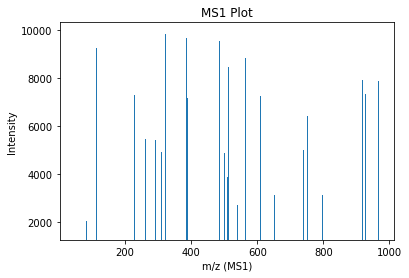

In [15]:
p.MS_Plot(MS_type="MS1")


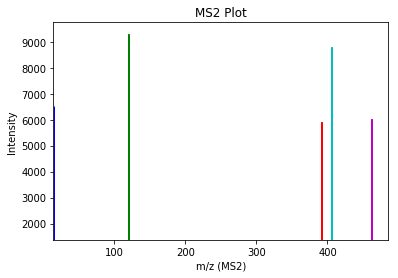

In [16]:
p.MS_Scan([50],[100],plot=True,colour=True)

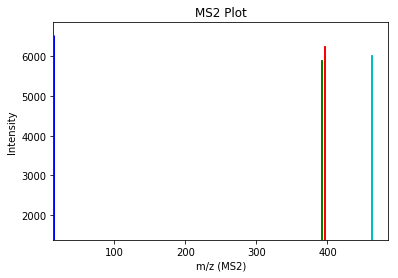

In [18]:
p.MS_Scan([0,80],[10,90],plot=True,colour=True)

In [19]:
p.MS_MultiScan([[0]],[[100]],[[0],[25],[50],[75]],[[25],[50],[75],[100]])

[[[462.0268896227332,
   462.1700148083691,
   396.1284609622338,
   396.1928295255771,
   396.2634792850947,
   396.3897942650162,
   15.35255415189317,
   15.244233037368094,
   15.387931592376594,
   391.7985621783792,
   391.87641581949003,
   391.88272268161637,
   391.778886448624,
   405.6112799659548,
   405.57025561500865,
   405.66364598542043,
   405.6256414075277,
   120.67909574297182,
   120.84883303215784,
   397.5314737800313,
   397.5943090194517,
   397.5915080871383,
   397.5994112654742],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]],
 [[0, 100], [0, 25], [25, 50], [50, 75], [75, 100]]]

In [22]:
class Peak(object):
    def __init__(self, mz, rt, intensity, ms_level, parent, filename=None, scan_number=None):
        self.mz = mz
        self.rt = rt
        self.intensity = intensity
        self.ms_level = ms_level
        self.filename = filename
        self.scan_number = scan_number
        self.parent = parent
        

In [26]:
p1 = Peak(123, 12, 11000, 1,None)

In [27]:
p2 = Peak(1233, 1123, 122, 2, p1)